In [20]:
import numpy as np
import scipy.optimize
import scipy.interpolate
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")

In [21]:
# функция рассчета вероятности дефолта
def D(r_g, r_c, T, R):
  """
  :param r_g    доходность государственных облигаций
  :param r_c    доходность облигации компании
  :param T      количество лет до погашения 
  :param R      recovery rate
  :return       вероятность дефолта компании
  """
  return (1 - np.power((1 + r_g)/(1 + r_c), T))/(1 - R)

**Облигации Германии и Италии**

In [120]:
# Last Update: 11 Jul 2023 20 GERM
# 1Y, 2Y, 3Y, 5Y, 7Y, 10Y, 20Y, 30Y
rates_germ = np.array([3.743, 3.379, 3.109, 2.789, 2.642, 2.646, 2.759, 2.655]) * 0.01
terms_germ = np.array([1, 2, 3, 5, 7, 10, 20, 30])

# Last Update: 11 Jul 2023 20 ITALY
# 1Y, 2Y, 3Y, 5Y, 7Y, 10Y, 20Y, 30Y
rates_itl = np.array([3.907, 3.981, 3.936, 3.991, 4.170, 4.409, 4.723, 4.771]) * 0.01
terms_itl = np.array([1, 2, 3, 5, 7, 10, 20, 30])

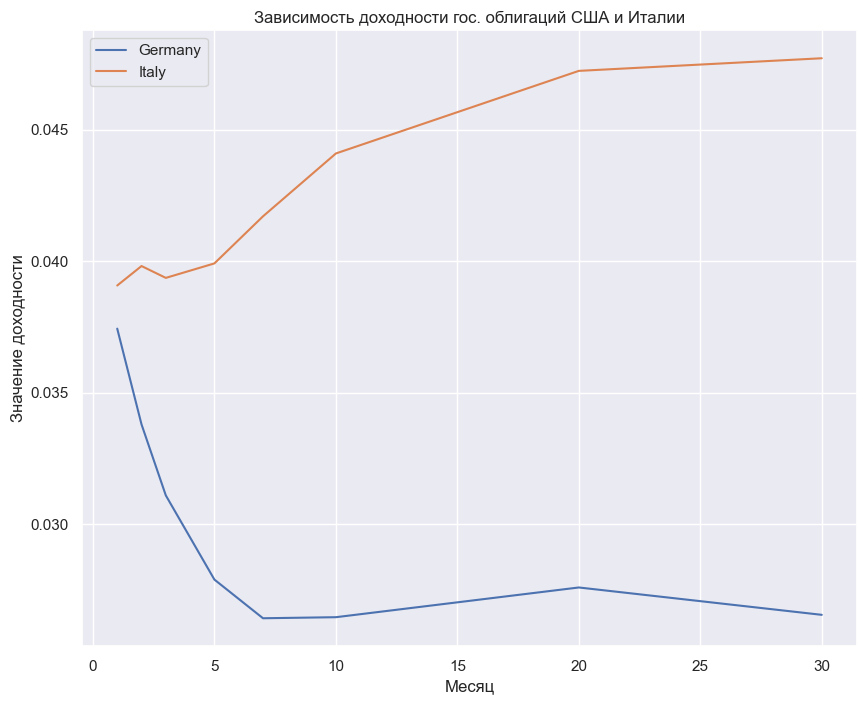

In [121]:
plt.figure(figsize=(10, 8))
plt.plot(terms_germ, rates_germ, label="Germany")
plt.plot(terms_itl, rates_itl, label="Italy")
plt.xlabel("Месяц")
plt.ylabel("Значение доходности")
plt.title("Зависимость доходности гос. облигаций США и Италии")
plt.legend();

**Рассчёт S(t) - вероятности, что эмитент доживет до момента t**

In [155]:
recovery_rate = 0.60
S_germ = np.array(D(rates_germ, rates_itl, terms_germ, recovery_rate))
S_germ

array([0.00394584, 0.0288638 , 0.05920257, 0.14118196, 0.24567203,
       0.39146436, 0.788031  , 1.14446556])

**Ленейная интерполяция графика вероятность дефолта Италии**

In [156]:
# добавили нулевой момент времени
period = np.concatenate((np.array([0]), terms_germ))
S_germ = np.concatenate((np.array([0]), S_germ))

f_d = scipy.interpolate.interp1d(period, S_germ, kind = 'linear')
term = np.linspace(0, 30, 120)

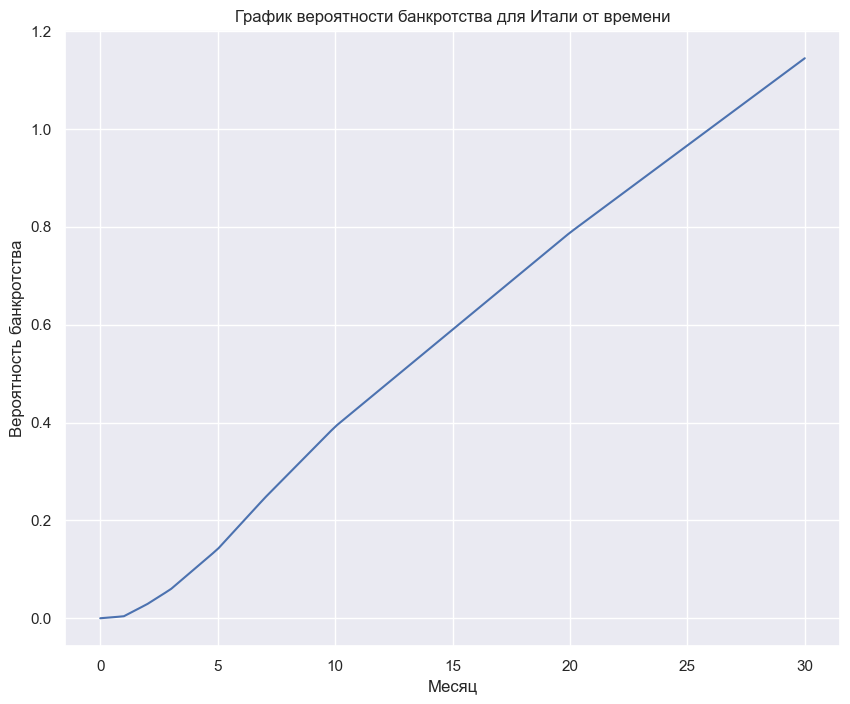

In [157]:
plt.figure(figsize=(10, 8))
val = f_d(term)
val[val < 0] = 0
plt.plot(term, val)
plt.xlabel("Месяц")
plt.ylabel("Вероятность банкротства")
plt.title("График вероятности банкротства для Итали от времени");

**Задача 2**

Постройте такую же табличку для продавца страховки.

Он заплатит 1 − `RecoveryRate` в купонную дату $T_n$, если референсный
эмитент разорится ровно между предыдущеий купонной датой
$T_{n−1}$ и $T_n$. 

Какова вероятность этого события в терминах $S(t)$?

При каком значении купона $x$ матожидание платежей покупателя
равно матожиданию платежа продавца?

**Покупатель:**



* Сколько платежей может теоретически сделать покупатель страховки?

    Своп рассчитан на 5 лет. Купон в кредитном свопе равен $х$ процентов годовых. 
    Так как платеж делается 4 раза в год, то всего платежей будет $5 * 4 = 20$ штук.

* Какова вероятность каждого из этих платежей в терминах $S(t)$?

    Если $S(t)$ - это верятность эмитента дожить до момента времени t, то вероятности для каждого платежа соответсвенно: $S(k/4) \ \ \ k = \overline{0,20}$

In [158]:
df_buyer = pd.DataFrame({'payment value': [f'x*0.25' for i in range(1, 21)], 
                         'S(t)': [1 - f_d(i/4) for i in range(1, 21)]})
df_buyer

,payment value,S(t)
0,x*0.25,0.999014
1,x*0.25,0.998027
2,x*0.25,0.997041
3,x*0.25,0.996054
4,x*0.25,0.989825
5,x*0.25,0.983595
6,x*0.25,0.977366
7,x*0.25,0.971136
8,x*0.25,0.963552
9,x*0.25,0.955967


**Продавец:**

In [159]:
df_seller = pd.DataFrame({'payment value(%)': [1 - recovery_rate for i in range(1,21)], 
                          '1  - S(t)': [(f_d(i/4) - (f_d((i - 1)/4))) for i in range(1, 21)]})
df_seller

,payment value(%),1 - S(t)
0,0.4,0.000986
1,0.4,0.000986
2,0.4,0.000986
3,0.4,0.000986
4,0.4,0.006229
5,0.4,0.006229
6,0.4,0.006229
7,0.4,0.006229
8,0.4,0.007585
9,0.4,0.007585


* При каком значении купона х матожидание платежей покупателя равно матожиданию платежа продавца?

In [160]:
x = 4 * (1 - recovery_rate) * df_seller["1  - S(t)"].sum() / df_buyer["S(t)"].sum()
x

0.011965696207123106

**Самопроверка**

Безрисковая облигация на 5 лет зарабатывает  2.789%

Рисковая облигация на 5 лет зарабатывает  3.991%

Страховка на эти 5 лет стоит 1.173%

Если мы бедем увеличивать Recovery Rate, то стоимость страховки будет увеличиваться.

Если доходность рисковой облигации увеличивается, то риск дефолта растет, страховка при этом тоже растет.